<a href="https://colab.research.google.com/github/marcinmichalsmolen/zum_nlp/blob/main/WUM5_Obraz_MarcinSmolen_s23429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praca domowa - obraz


Najpierw upewnijmy się, że pracujemy na GPU. 

* Włącz GPU (Runtime / Change runtime type)

## MNIST



### Wczytanie i wizualizacja

* Wczytaj dane mnist do zmiennych X_train, y_train, X_test, y_test.
https://keras.io/datasets/

In [36]:
from keras.datasets import mnist as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()

Teraz sprawdź i napisz:
* ile mamy instancji treningowych:
* ile mamy instancji testowych:
* jakie są wymiary w pixelach jednego obrazka:
* ile kanałów ma jeden obrazek:
* ile bajtów zajmuje jeden piksel:
* jaka jest minimalna i maksymalna wartość piksela:



In [37]:
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)



*   Instancji treningowych mamy 60000, 
*   testowych 10000, 
*   wymiary w pixelach: 28 x 28, 
*   jeden obrazek ma jeden kanał (odcienie szarości), 
*   1 piksel zajmuje 1 bajt czyli 2^8 ,
*   Minimalna wartość 0, maksymalna 255


Świetnie, teraz: 
* Wyrysuj pierwsze 12 elementów zbioru treningowego.
* Wypisz lub narysuj etykiety tych 12 elementów. 

[Tutaj są różne color mapy.](  
https://matplotlib.org/examples/color/colormaps_reference.html), których możesz użyć w funkcji imshow.  

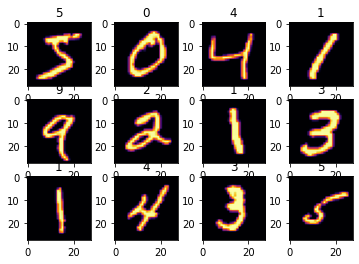

In [38]:
# Rysowanie 12 elementów - etykiety na górze
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='inferno')
  plt.title(y_train[i])
plt.show()

In [39]:
# Wypisanie samych 12 etykiet
for i in range(12):
 print(y_train[i])


5
0
4
1
9
2
1
3
1
4
3
5


* Teraz narysuj swój numer studenta używając cyfr zbioru mnist. Jeśli Twój indeks to np. s12345, wyrysuj 5 obrazków z cyframi '1', '2', '3', '4' i '5' obok siebie. 

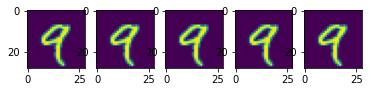

In [51]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(5):
  plt.subplot(3, 5, i+1)
  plt.imshow(X_train[5]),
  plt.imshow(X_train[7]),
  plt.imshow(X_train[2]),
  plt.imshow(X_train[5]),
  plt.imshow(X_train[4]),
plt.show()



### Klasyfikacja CNN'em

####Przygotowanie danych

Przygotujmy nasze dane treningowe:
* Przerób X_train i X_test tak, żeby wartości wszystkich pixeli były zawarte w przedziale <0,1>
* Zmień typ naszych pixeli na 'float32'

*Może się przydać metoda astype.*

In [52]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Przygotowaliśmy dane treningowe, teraz jeszcze etykiety.  W tej chwili jest to wektor liczb - dla każdej instancji mamy jedną liczbę. Nasza sieć będzie miała na wyjściu 10 wartości (wynik dla każdej klasy), więc musimy przerobić nasze liczby do postaci one-hot. Jeśli klasy trzech instancji to np. [0, 3, 5], w postaci one-hot będziemy mieć na przykład coś takiego:  
[1000000000]  
[0001000000]  
[0000010000]

Możesz do tego użyć funkcji [to_categorical](https://keras.io/api/utils/python_utils/).

* Przekonwertuj etykiety do postaci one-hot i wpisz wyniki do zmiennych Y_train i Y_test. 
* Wypisz 10 pierwszych elementów Y_train oraz y_train. 
* Napisz, jak w nowej postaci będą zapisane etykiety cyfr: 1, 2 i 4. 
* Wypisz kolejne cyfry swojego numeru indeksu używając powyższego zapisu. 

In [53]:
from keras.utils.np_utils import to_categorical as tk
Y_train = tk(y_train)
Y_test =tk(y_test)

In [55]:
print('10 pierwszych elementów Y_train oraz y_train:')
for i in range(10):
 print([i], Y_train[i], y_train[i])

10 pierwszych elementów Y_train oraz y_train:
[0] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[1] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[2] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[3] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[4] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[5] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[6] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[7] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[8] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[9] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


Nowa postać etykiet cyfr 1, 2 i 4:
*   1 to [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.],
*   2 to [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.],
*   4 to [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [57]:
print('NUMER INDEKSU s23429:')
print(Y_train[5], y_train[5])
print(Y_train[7], y_train[7])
print(Y_train[2], y_train[2])
print(Y_train[5], y_train[5])
print(Y_train[4], y_train[4])

NUMER INDEKSU s23429:
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9


Pierwsze warstwy naszej sieci będą typu Conv2D. Przyjmują one dane instancji w postaci wielowymiarowych tablic. Nie spłaszczamy zatem danych do postaci wektora - jak musielibyśmy zrobić w przypatku SVM lub MLP. Zrobi to dopiero potem warstwa Flatten naszej sieci.  

Przekazujemy sieci instancje w postaci szerokość x wysokość x liczba_kanałów (format 'channels_last', w przypdku formatu 'channels_first' tablica miałaby wymiary liczba_kanałów x szerokość x wysokość).

* upewnij się, że działamy w trybie channels_last (keras.backend.image_data_format())
* sprawdź jeszcze raz shape danych treningowych i testowych
* jeśli brakuje nam ostatniego wymiaru, dodajmy go

*np.expand_dims(X_train, -1) powinien nam dodać brakujący wymiar na końcu; opcjonalnie można użyć kodu z ćwiczeń*

 

In [58]:
from keras import backend as K
print(K.image_data_format())
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

channels_last
X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)


#### Przygotowanie sieci

Prawdopodobnie przydadzą nam się poniższe importy. 
```python
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
```

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import tensorflow as tf
insh = (28, 28, 1)

* Zbuduj sieć z takimi warstwami:
 * Na wejściu [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/): 16 filtrów, kernel 3x3, padding 'same', activation [relu](https://cs-cheatsheet.readthedocs.io/en/latest/_images/activation_functions.png)
 * [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/): pool_size 2x2
 * Conv2D: 32 filtry, kernel 3x3, padding 'same', activation relu
 * MaxPooling2D: pool_size 2x2
 * [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) (spłaszczamy dane do 1-wymiarowego wektora)
 * Na wyjściu [Dense](https://keras.io/api/layers/core_layers/dense/), units tyle, co klas, [aktywacja softmax](https://qph.fs.quoracdn.net/main-qimg-fda2f008df90ed5d7b6aff89b881e1ac)

Pierwsza warstwa będzie oczekiwać podania kształtu danych (input_shape). Czyli szerokość x wysokość x liczba kanałów. 

In [60]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Sprawdź, jak wygląda Twoja sieć  
Przyda się metoda model.summary i ewentualnie funkcja keras.utils.vis_utils.plot_model

In [61]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

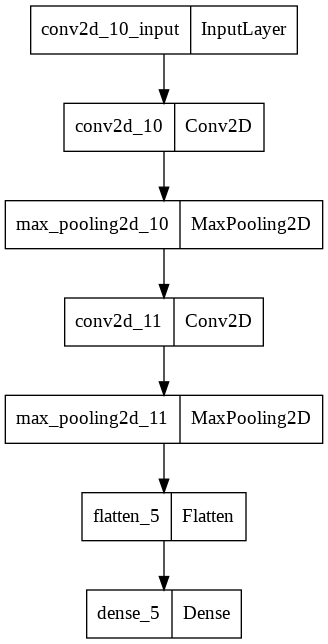

In [62]:
import tensorflow as tf
tf.keras.utils.plot_model(
  model,
  to_file='model.png',
  show_shapes=False,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=False
)


* Spróbuj usunąć argument padding i napisz, co się zmieniło. 
* Przywróć padding. 

In [63]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

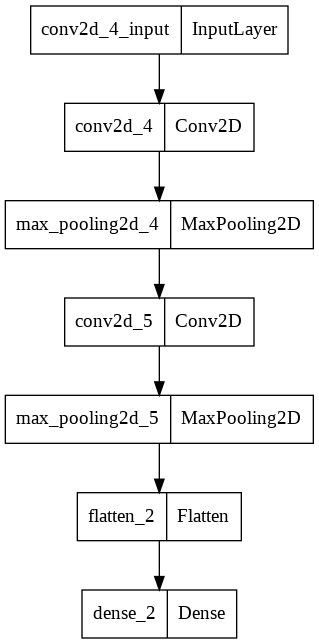

In [17]:
import tensorflow as tf
tf.keras.utils.plot_model(
  model,
  to_file='model.png',
  show_shapes=False,
  show_dtype=False,
  show_layer_names=True,
  rankdir='TB',
  expand_nested=False,
  dpi=96,
  layer_range=None,
  show_layer_activations=False
)


Po usunięciu argumentu padding mamy mnie parametrów sieci. W kolejnych warstwach mamy inny Output shape (mniejszy) - np w drugiej warstwie zamiast (None, 14, 14, 16) mamy (None, 13, 13, 16) i to wpływa na kształt kolejnych warstw i tak na prawie samym końcu po spłaszczeniu do 1-wymiarowego wektora mamy bez argumentu padding  (None, 800) zamiast  (None, 1152)

In [64]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Odpowiedz na poniższe pytania: 
* Czy warstwa Conv2D się uczy w trakcie treningu?: 
* Czy warstwa MaxPooling2D się uczy w trakcie treningu?:
* Dlaczego przed warstwą / warstwami Dense umieszczamy warstwę Flatten?:
* Ile będziemy mieć kanałów / map aktywacji po przepuszczeniu obrazka przez pierwszą warstwę Conv2D naszej sieci?:




* Warstwa Conv2D jako warstwa wejściowa nie uczy się tylko przekazuje dalej dane wejściowe
*  Warstwa MaxPooling2D to algorytm, który w każdej epoce działą tak samo (też się nie uczy) List item
*  Dense implementuje operację: wyjście = aktywacja - spłaszczenie pozwala połączyć całą wartwę z warstwą Dense będącą wyjściem sieci
*  Po przepuszczeniu przez pierwszą warstwę Conv2D będziemy mieli 16 kanałów/map aktywacji

Teraz:
* Uruchom metodę compile: loss 'categorical_crossentropy', optimizer 'adam'. Argument metrics przyjmuje tablicę stringów, możemy tam np. śledzić 'accuracy'. 

In [65]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [66]:
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [67]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

#### Trening
* Wytrenuj sieć. 100 epok, batch_size 256.

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.4875 - accuracy: 0.8718
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1124 - accuracy: 0.9670
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0767 - accuracy: 0.9769
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0629 - accuracy: 0.9810
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0531 - accuracy: 0.9840
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0473 - accuracy: 0.9855
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0420 - accuracy: 0.9874
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0404 - accuracy: 0.9879
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0362 - accuracy: 0.9891
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0339 - accura

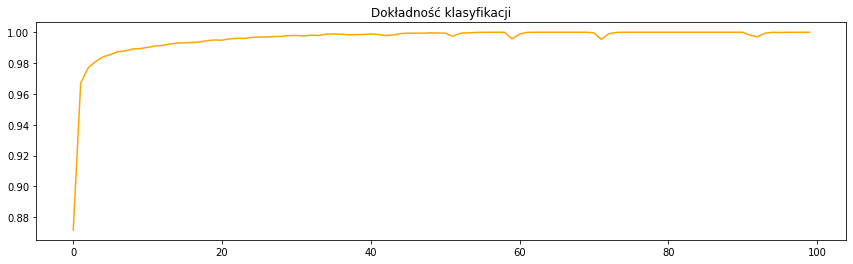

In [68]:
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    )
summarize_diagnostics(history)



#### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate). 
* Podaj wyniki dla obu zbiorów: 
* Czy wyniki się różnią? Dlaczego? 

In [69]:
train_accuracy = model.evaluate(X_train, Y_train)
test_accuracy = model.evaluate(X_test, Y_test)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9895
Dokładności klasyfikacji na materiale treningowym  =  [7.342081516981125e-05, 1.0]
dokładności klasyfikacji na materiale testowym  =  [0.06640318781137466, 0.9894999861717224]


Wyniki nieznacznie się różnią, gdyż model radzi sobie lepiej na zbiorze treningowym (na którym się uczył) niż na testowym

## FASHION MNIST 
Teraz powtórzymy eksperyment na innym, ale bardzo podobnym zbiorze danych. 

### Wczytanie i przygotowanie danych
* Wczytaj zbiór fashion_mnist analogicznie do mnist'a
* Przygotuj dane treningowe/testowe oraz etykiety analogicznie do mnista'a

In [70]:
from keras.datasets import fashion_mnist as dataset
import numpy as np
(X_train, y_train), (X_test, y_test) = dataset.load_data()
print("X_train: {}, y_train: {}", X_train.shape, y_train.shape)
print("X_test: {}, y_test: {}", X_test.shape, y_test.shape)

X_train: {}, y_train: {} (60000, 28, 28) (60000,)
X_test: {}, y_test: {} (10000, 28, 28) (10000,)


* Wyświetl 12 pierwszych instancji treningowych

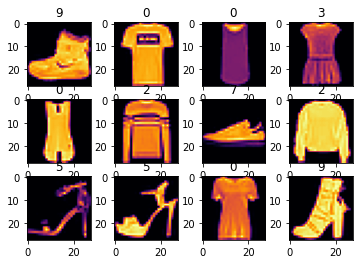

In [71]:
# Rysowanie 12 elementów - etykiety na górze
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')
for i in range(12):
  plt.subplot(3, 4, i+1)
  plt.imshow(X_train[i], cmap='inferno')
  plt.title(y_train[i])
plt.show()

* Przygotuj dane i etykiety do treningu (tak samo jak w mnist)

In [72]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras.utils.np_utils import to_categorical as tk
Y_train = tk(y_train)
Y_test =tk(y_test)

### Przygotowanie sieci i trening

* Stwórz identyczną sieć jak przy mnist i przeprowadź trening. 

In [73]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
235/235 [==============================] - 2s 5ms/step - loss: 0.7188 - accuracy: 0.7546
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.4267 - accuracy: 0.8501
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8641
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3588 - accuracy: 0.8736
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3366 - accuracy: 0.8817
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3224 - accuracy: 0.8869
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3112 - accuracy: 0.8905
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2971 - accuracy: 0.8961
Epoch 9/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2883 - accuracy: 0.8983
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2810 - accura

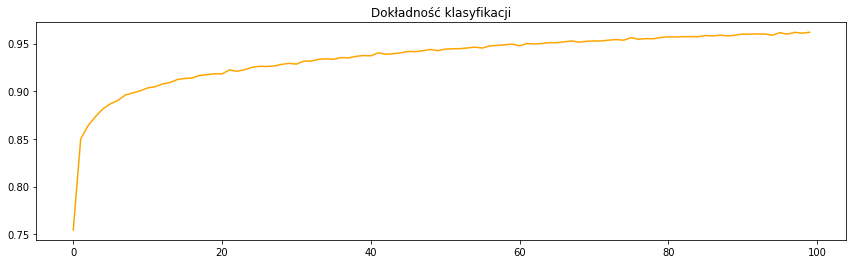

In [75]:
history2 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    )
summarize_diagnostics(history2)

### Ewaluacja
* Zrób ewaluację naszego modelu na zbiorze treningowym i testowym (metoda evaluate).
* Podaj wyniki dla obu zbiorów:

In [76]:
train_accuracy = model.evaluate(X_train, Y_train)
test_accuracy = model.evaluate(X_test, Y_test)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)


313/313 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.9068
Dokładności klasyfikacji na materiale treningowym  =  [0.09906323999166489, 0.965233325958252]
dokładności klasyfikacji na materiale testowym  =  [0.3275013566017151, 0.9067999720573425]


### Early stopping
* Dodajmy do treningu zbiór walidacyjny - możesz do tego użyć argumentu 'validation_split' metody [fit](https://keras.io/api/models/model_training_apis/). Zróbmy 10%. 
* Dodaj [early stopping](https://keras.io/api/callbacks/early_stopping/), patience 5. 
* Przeprowadź dwa treningi - najpierw monitorując w early stopping 'loss' a potem 'val_loss'. Jaka jest różnica? 

Jeśli early stopping nie miał okazji zadziałać, zwiększ liczbę epok. 

In [77]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from matplotlib import pyplot

In [78]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelx', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')

Epoch 1/100
211/211 [==============================] - 2s 9ms/step - loss: 0.1071 - accuracy: 0.9622 - val_loss: 0.1073 - val_accuracy: 0.9588
Epoch 2/100
211/211 [==============================] - 2s 8ms/step - loss: 0.1049 - accuracy: 0.9623 - val_loss: 0.1050 - val_accuracy: 0.9607
Epoch 3/100
211/211 [==============================] - 2s 8ms/step - loss: 0.1026 - accuracy: 0.9640 - val_loss: 0.1066 - val_accuracy: 0.9593
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1025 - accuracy: 0.9633 - val_loss: 0.1323 - val_accuracy: 0.9488
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.1046 - accuracy: 0.9623 - val_loss: 0.1203 - val_accuracy: 0.9560
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.1037 - accuracy: 0.9633 - val_loss: 0.1207 - val_accuracy: 0.9542
Epoch 7/100
211/211 [==============================] - 2s 8ms/step - loss: 0.1010 - accuracy: 0.9647 - val_loss: 0.1303 - val_accuracy: 0.9503

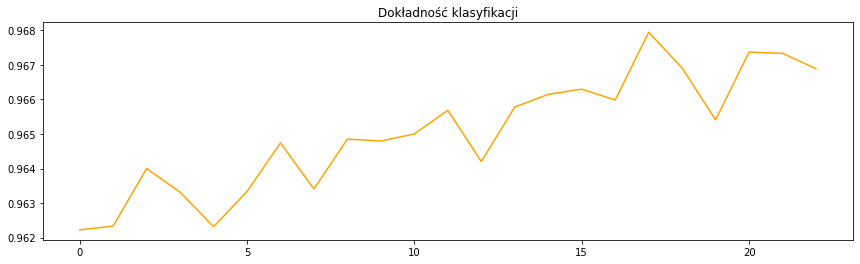

In [79]:
history3 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelx')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history3)

**Drugi trening z monitor='val_loss'**




Epoch 1/100
211/211 [==============================] - 2s 9ms/step - loss: 0.0863 - accuracy: 0.9699 - val_loss: 0.1787 - val_accuracy: 0.9338
Epoch 2/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0860 - accuracy: 0.9698 - val_loss: 0.1677 - val_accuracy: 0.9392
Epoch 3/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0864 - accuracy: 0.9696 - val_loss: 0.1658 - val_accuracy: 0.9417
Epoch 4/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0871 - accuracy: 0.9690 - val_loss: 0.1892 - val_accuracy: 0.9328
Epoch 5/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0858 - accuracy: 0.9691 - val_loss: 0.1859 - val_accuracy: 0.9358
Epoch 6/100
211/211 [==============================] - 1s 6ms/step - loss: 0.0865 - accuracy: 0.9682 - val_loss: 0.2130 - val_accuracy: 0.9265
Epoch 7/100
211/211 [==============================] - 1s 5ms/step - loss: 0.0851 - accuracy: 0.9697 - val_loss: 0.1774 - val_accuracy: 0.9352

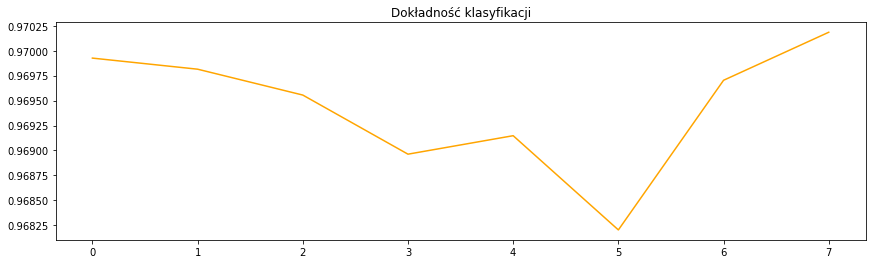

In [81]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modely', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history4 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modely')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history4)

### Poprawa wyniku
* Spróbuj stworzyć 3 sieci, które uzyskają lepszy wynik na zbiorze fashion_mnist. Możesz zmodyfikować naszą prostą sieć lub zaprojektować zupełnie nową. 
* Poeksperymentuj z modyfikacjami warstw Conv2D (np. zmiana liczby filtrów), dodawaniem warstw Conv2D i Dense. Możesz też dodać Dropout. 
* Dla każdej z tych sieci przeprowadź ewaluację i wypisz wyniki. 

**Sieć CNN nr 1 (dodatkowa warstwa Conv2D)**

In [84]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

Epoch 1/100
211/211 [==============================] - 3s 10ms/step - loss: 0.7867 - accuracy: 0.7263 - val_loss: 0.4899 - val_accuracy: 0.8190
Epoch 2/100
211/211 [==============================] - 2s 9ms/step - loss: 0.4427 - accuracy: 0.8423 - val_loss: 0.4067 - val_accuracy: 0.8538
Epoch 3/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3796 - accuracy: 0.8656 - val_loss: 0.3565 - val_accuracy: 0.8695
Epoch 4/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3434 - accuracy: 0.8773 - val_loss: 0.3344 - val_accuracy: 0.8813
Epoch 5/100
211/211 [==============================] - 2s 9ms/step - loss: 0.3180 - accuracy: 0.8869 - val_loss: 0.3136 - val_accuracy: 0.8872
Epoch 6/100
211/211 [==============================] - 2s 9ms/step - loss: 0.2983 - accuracy: 0.8935 - val_loss: 0.3050 - val_accuracy: 0.8892
Epoch 7/100
211/211 [==============================] - 2s 9ms/step - loss: 0.2820 - accuracy: 0.8999 - val_loss: 0.2816 - val_accuracy: 0.89

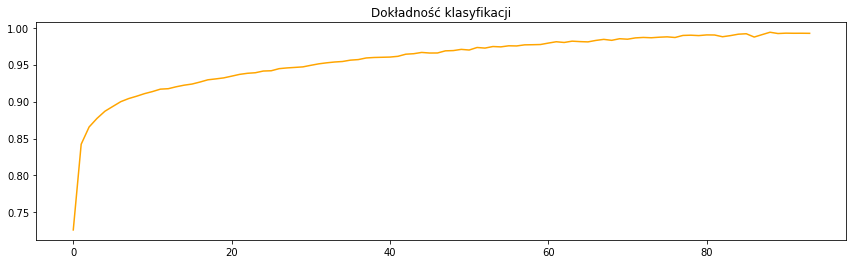

In [85]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelz', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history5 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelz')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history5)

**Sieć CNN nr 2 (dodatkowa warstwa Conv2D i Max_Pooling2D, więcej kanałów/map aktywacji)**

In [92]:
model = Sequential([
  Conv2D(32, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(128, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 2, 2, 128)      

Epoch 1/100
211/211 [==============================] - 3s 13ms/step - loss: 0.7100 - accuracy: 0.7507 - val_loss: 0.4476 - val_accuracy: 0.8397
Epoch 2/100
211/211 [==============================] - 2s 12ms/step - loss: 0.4055 - accuracy: 0.8544 - val_loss: 0.3726 - val_accuracy: 0.8692
Epoch 3/100
211/211 [==============================] - 2s 12ms/step - loss: 0.3437 - accuracy: 0.8755 - val_loss: 0.3389 - val_accuracy: 0.8758
Epoch 4/100
211/211 [==============================] - 3s 16ms/step - loss: 0.3107 - accuracy: 0.8874 - val_loss: 0.3206 - val_accuracy: 0.8812
Epoch 5/100
211/211 [==============================] - 2s 12ms/step - loss: 0.2902 - accuracy: 0.8947 - val_loss: 0.3158 - val_accuracy: 0.8830
Epoch 6/100
211/211 [==============================] - 2s 12ms/step - loss: 0.2730 - accuracy: 0.9017 - val_loss: 0.3104 - val_accuracy: 0.8907
Epoch 7/100
211/211 [==============================] - 2s 12ms/step - loss: 0.2580 - accuracy: 0.9062 - val_loss: 0.3013 - val_accuracy:

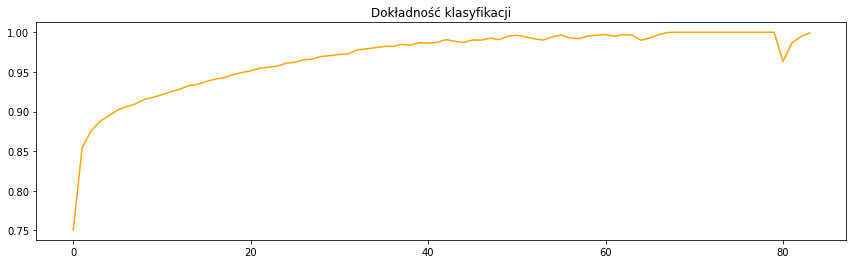

In [93]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelw', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history6 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelw')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history6)

**Sieć CNN nr 3 (dodatkowa warstwa Conv2D, Max_Pooling2D, Dense i Dropout)**

In [95]:
from keras.layers import Dropout

In [96]:
model = Sequential([
  Conv2D(16, kernel_size=(3,3), padding='same',activation='relu', input_shape = insh),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(32, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(64, kernel_size=(3,3), activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 2, 2, 64)       

Epoch 1/100
211/211 [==============================] - 3s 11ms/step - loss: 0.8269 - accuracy: 0.7053 - val_loss: 0.4898 - val_accuracy: 0.8190
Epoch 2/100
211/211 [==============================] - 2s 11ms/step - loss: 0.4850 - accuracy: 0.8245 - val_loss: 0.4255 - val_accuracy: 0.8468
Epoch 3/100
211/211 [==============================] - 2s 11ms/step - loss: 0.4128 - accuracy: 0.8519 - val_loss: 0.3672 - val_accuracy: 0.8717
Epoch 4/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3738 - accuracy: 0.8653 - val_loss: 0.3377 - val_accuracy: 0.8763
Epoch 5/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3494 - accuracy: 0.8736 - val_loss: 0.3172 - val_accuracy: 0.8847
Epoch 6/100
211/211 [==============================] - 2s 10ms/step - loss: 0.3332 - accuracy: 0.8779 - val_loss: 0.3104 - val_accuracy: 0.8860
Epoch 7/100
211/211 [==============================] - 2s 12ms/step - loss: 0.3163 - accuracy: 0.8845 - val_loss: 0.2965 - val_accuracy:

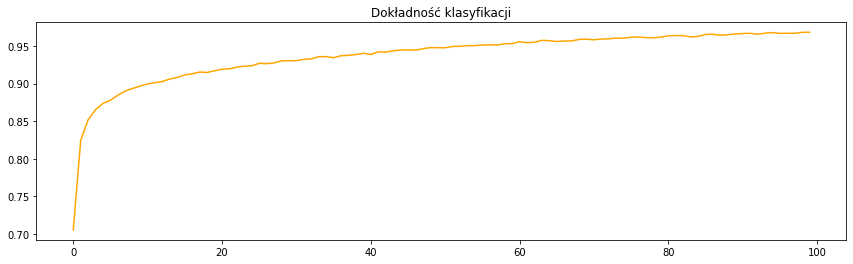

In [97]:
f1 = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=0, patience=5, mode="auto")
f2 = tf.keras.callbacks.ModelCheckpoint(filepath='modelv', save_weights_only = False, monitor = 'accuracy', mode='max', save_best_only = True)
f3 = tf.keras.callbacks.TensorBoard(log_dir='./logs')
history7 = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=256,
    epochs=100,
    verbose="auto",
    callbacks= [f1,f2,f3],
    validation_split=0.1,
    )
trained_model = keras.models.load_model('modelv')
train_accuracy = trained_model.evaluate(X_train, Y_train)
test_accuracy = trained_model.evaluate(X_test, Y_test)
print(train_accuracy + test_accuracy)
print('Dokładności klasyfikacji na materiale treningowym  = ',train_accuracy)
print('dokładności klasyfikacji na materiale testowym  = ',test_accuracy)
summarize_diagnostics(history7)

To wszystko. Dziękuję! 